# Customers Churn Prediction

### Table of Contents
* [Customers Churn Prediction](#scrollTo=aa-TeKuUj6Hw)
    * [Supervised Learning](#scrollTo=Qew1EeRFj0j4)
    * [1. Data Preparation and EDA](#scrollTo=UQhiK3v3j0j6)
        * [1.1. Data Preparation](#scrollTo=NR2Zjkuij0j-)
            * [1.1.1. Loading Data, Displaying Samples and Information](#scrollTo=NR2Zjkuij0j-)
            * [1.1.2. Checking Missing Value](#scrollTo=gUetNTh8j0kI)
            * [1.1.3. Handle Missing Value](#scrollTo=Wa4zSDVZj0kL)
        * [1.2. EDA and Data Visulization](#scrollTo=sxGWS9uGj0kW)
            * [1.2.1. Data Visualization of Continues Column](#scrollTo=YlTul6hUj0kX)
            * [1.2.2. Data Visualization of Category Columns](#scrollTo=52APg6KIj0kY)
    * [2. Splitting Data and Training Models without Scaling](#scrollTo=aWCFretTj0ka)
        * [2.1. Checking Class Balance](#scrollTo=aWCFretTj0ka)
        * [2.2. Split the Data to Train, Validation, and Test](#scrollTo=5VXpVePwj0ke)
        * [2.3. Create Model Without Scaling](#scrollTo=rUN06qTRj0kn)
            * [2.3.1. Decision Tree Model](#scrollTo=rUN06qTRj0kn)
            * [2.3.2. Logistic Regression Model](#scrollTo=MXN7TElXj0kp)
            * [2.3.3. Random Forest Model](#scrollTo=FMGtRdLMj0kq)
            * [2.3.4. K-Nearest Neighbors Model](#scrollTo=9AkXxWRIj0kr)
    * [3. Improving Model Quality](#scrollTo=hY26GvsYj0kt)
        * [3.1. Upsampling](#scrollTo=qFkI0lTRj0kt)
        * [3.2. Standard Scaller](#scrollTo=RCr8A3xXj0k4)
    * [4. Training Models with Scaling](#scrollTo=KtOFVq3Aj0k9)
        * [4.1. Decision Tree](#scrollTo=KtOFVq3Aj0k9)
        * [4.2. Logistic Regression](#scrollTo=4nuYLMWyj0lD)
        * [4.3. Random Forest](#scrollTo=lC-XxbdHj0lM)
        * [4.4. K-Nearest Neighbors](#scrollTo=Vs3Q1Wlqj0lS)
* [Conclusions](#scrollTo=MKhE22nkj0lZ)



## Supervised Learning

Bank Beta's customers are leaving the company: little by little, their number is decreasing every month. Bank employees realized it was cheaper to retain their loyal old customers than to attract new ones.

In this case, our task is to predict whether a customer will leave the Bank soon or not. We have data regarding clients' past behavior and history of termination of their contracts with the Bank.

We will build a model with the highest possible F1 score. We need a minimum F1 score of 0.59 for the test dataset to pass the review. Check the F1 value for the test set.

In addition, we'll measure the AUC-ROC metric and compare it to the F1 score.

**Objective:**
- Predict whether a customer will soon leave the Bank or not.
- Train models without considering class imbalance.
- Improve data quality for running models.
- Find the best model to predict the Bank's customers.

## Data Preparation and EDA

**Loading Libraries**

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sidetable
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

### 1.1. Data Preparation

#### 1.1.1. Loading Data, Displaying Samples and Information

**Data Description:**

**Features**
- `RowNumber` — data string index
- `CustomerId` — Customer ID
- `Surname` — last name
- `CreditScore` — credit score
- `Geography` — country of residence
- `Gender` — gender
- `Age` — age
- `Tenure` — maturity period for customer fixed deposits (years)
- `Balance` — account balance
- `NumOfProducts` — number of bank products used by customers
- `HasCrCard` — whether the customer has a credit card
- `IsActiveMember` — level of customer activity
- `EstimatedSalary` — estimated salary

**Target**
- `Exited` — whether the customer has quit

In [3]:
# load the dataset
try:
    df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/Churn.csv')
except:
    df = pd.read_csv('/content/Churn.csv')

In [4]:
# display the sample of dataset
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Before we do further analysis, to make it easier to do the analysis, we will change the register of all columns to **lower**.

In [5]:
# change the column register
df.columns = df.columns.str.lower()
df.columns.values

array(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'], dtype=object)

In [6]:
# show the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


#### 1.1.2. Checking Missing Value

In [7]:
# displaying missing values
df.stb.missing().reset_index()

,index,missing,total,percent
0,tenure,909,10000,9.09
1,rownumber,0,10000,0.00
2,customerid,0,10000,0.00
3,surname,0,10000,0.00
4,creditscore,0,10000,0.00
5,geography,0,10000,0.00
6,gender,0,10000,0.00
7,age,0,10000,0.00
8,balance,0,10000,0.00
9,numofproducts,0,10000,0.00


Missing data only occurs in the `tenure` column around **9%** of the data. The `tenure` column contains the maturity period for customer fixed deposits (years). We will check whether the missing value is the same as **0** before carrying out further analysis.

In [8]:
# check value 0 of tenure column
df['tenure'].value_counts(dropna=False).sort_index()

0.0     382
1.0     952
2.0     950
3.0     928
4.0     885
5.0     927
6.0     881
7.0     925
8.0     933
9.0     882
10.0    446
NaN     909
Name: tenure, dtype: int64

In the `tenure` column, there is also a value **0** containing customers who do not have a deposit payment term, meaning that missing value is not a value of **0**.

In [9]:
# checking distribution
df.loc[df['tenure'].isna()]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


#### 1.1.3. Handle Missing Value

In [10]:
# Fill in the missing values of the tenure column based on age
df['tenure'] = np.round(df['tenure'].fillna(df.groupby(['age'])['tenure'].transform('mean')))
df['tenure'].isna().sum()

0

In [11]:
# check value 0 of tenure column
df['tenure'].value_counts(dropna=False).sort_index()

0.0      382
1.0      953
2.0      950
3.0      929
4.0      901
5.0     1798
6.0      901
7.0      925
8.0      933
9.0      882
10.0     446
Name: tenure, dtype: int64

Missing value has been filled.

**Drop Unnecessary Columns**

In [12]:
# remove columns that are not needed
df.drop(['rownumber', 'customerid', 'surname'], axis=1, inplace=True)
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### 1.2. EDA and Data Visulization

#### 1.2.1. Data Visualization of Continues Column

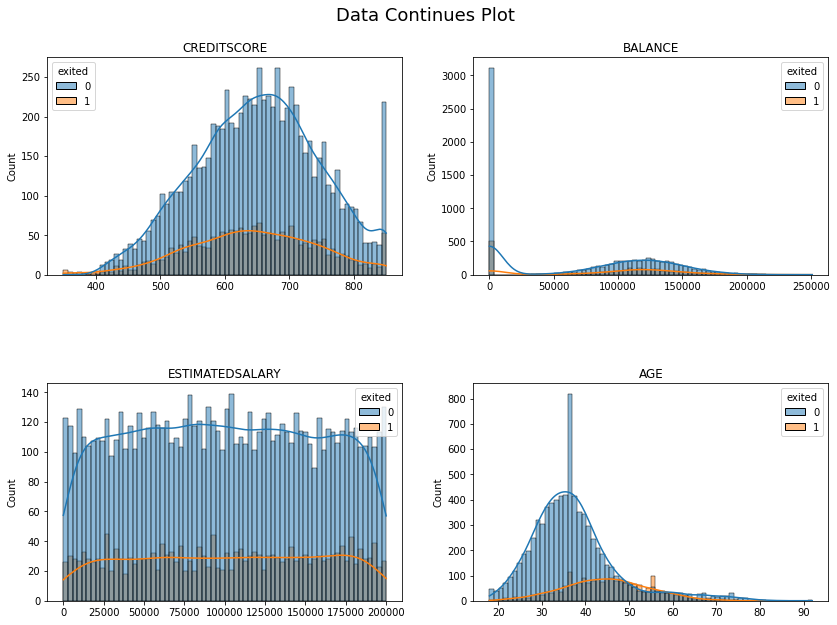

In [13]:
# define subplot grid
columns = ['creditscore', 'balance', 'estimatedsalary', 'age']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Data Continues Plot', fontsize=18, y=0.95)

# loop through columns and axes
for column, ax in zip(columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.histplot(x=df[column], kde=True, hue=df['exited'], bins=70, ax=ax)

    # chart formatting
    ax.set_title(column.upper())
    ax.set_xlabel('')

plt.show()

**Findings:**
- Of the two groups of customers who are **exited** and those who are not, the majority have an average credit score between **550 - 750**.
- Many customers have no remaining balance in their account there are around **500** people from the **exited** group and more than **3000** customers from the **stay** group. The other majority are from they also have an average balance between **100,000 - 150,000**
- Estimated Salary has an even distribution starting from **0 - 200,000**.
- The majority of the group that remained faithful had an age range of under **50** years, while the **exited** group had an age range of **40-60** years.

#### 1.2.2. Data Visualization of Category Columns

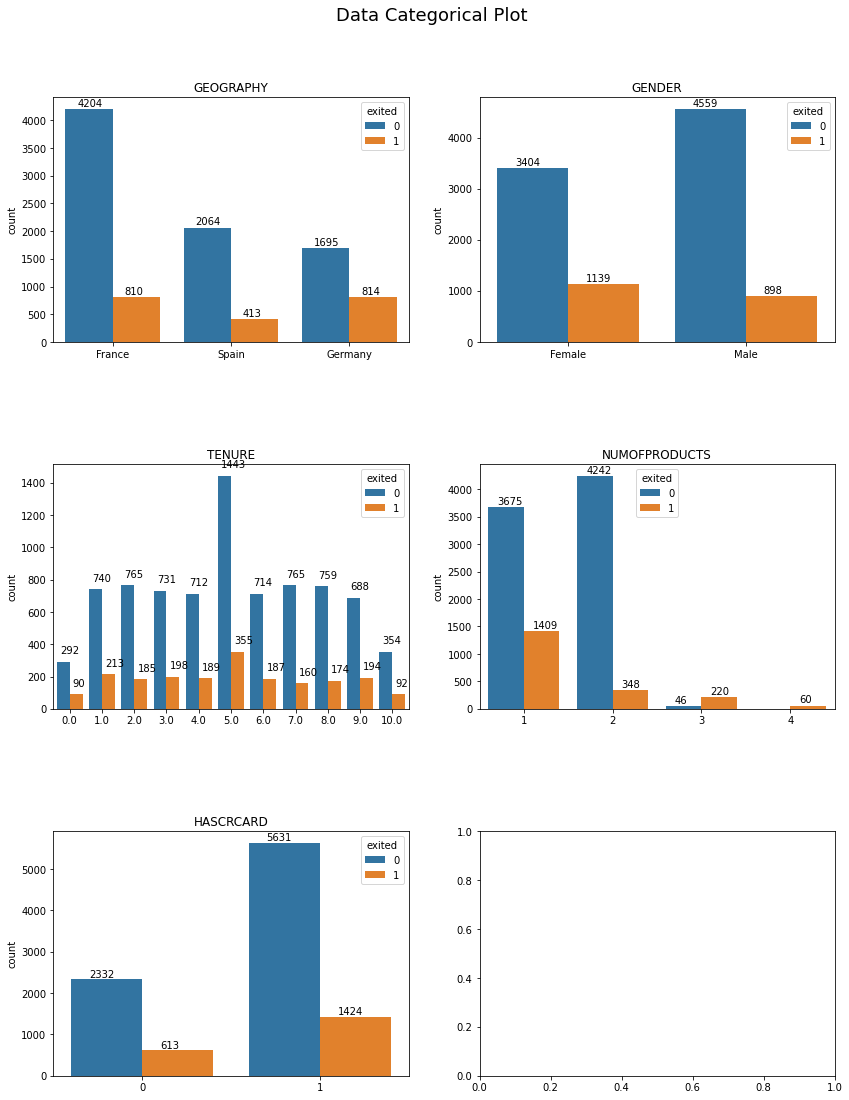

In [14]:
# define subplot grid
labels = ['geography', 'gender', 'tenure', 'numofproducts', 'hascrcard']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Data Categorical Plot', fontsize=18, y=0.95)

# loop through labels and axes
for label, ax in zip(labels, axs.ravel()):
    # filter df for label and plot on specified axes
    splot = sns.countplot(data=df, x=df[label], hue=df['exited'],  ax=ax)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

    # chart formatting
    ax.set_title(label.upper())
    ax.set_xlabel('')

plt.show()

**Findings:**
- The majority of Bank Beta's customers come from France
- Most Bank Beta customers use at least **1-2** products issued by the bank.
- The majority of Bank Beta's customers also have a card.

## 2. Splitting Data and Training Models without Scaling

### 2.1. Checking Class Balance

In [15]:
# Display the number of columns is_ultra
df.groupby('exited').agg(count=('creditscore', 'count')).reset_index()

,exited,count
0,0,7963
1,1,2037


In [16]:
# calculate the ratio
df['exited'].value_counts() / df.shape[0] * 100

0    79.63
1    20.37
Name: exited, dtype: float64

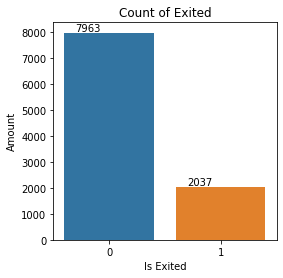

In [17]:
# Creating diagrams
plt.figure(figsize=(4,4))
splot = sns.countplot(x='exited', data=df, order=df['exited'].value_counts().index)
plt.xlabel('Is Exited')
plt.ylabel('Amount')
plt.title('Count of Exited')
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

The data comparison in the column 'exited' is **80** with **20**..

### 2.2. Split the Data to Train, Validation, and Test

In [18]:
# convert categorical variables to indicator variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Columns containing categorical value have been correctly converted. 

In [19]:
# split the dataset into features and targets
X = df.drop(['exited'], axis=1)
y = df['exited']

In [20]:
# checking data size
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [21]:
# Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.15, random_state = 8)

# Use the same function above for the validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
    test_size=0.18, random_state= 8) 

In [22]:
# display dataset dimensions
print('X_train shape', X_train.shape)
print('X_valid shape', X_valid.shape)
print('X_test shape', X_test.shape)

X_train shape (6970, 11)
X_valid shape (1530, 11)
X_test shape (1500, 11)


In [23]:
# display X-train sample data
X_train

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
2500,711,38,10.0,0.00,2,0,0,53311.78,0,0,1
4244,540,64,1.0,91869.69,1,0,1,95421.00,1,0,1
298,511,58,0.0,149117.31,1,1,1,162599.51,0,0,1
2878,487,36,1.0,140137.15,1,1,0,194073.33,0,1,0
4450,633,59,2.0,103996.74,1,1,1,103159.11,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3642,778,42,6.0,0.00,2,1,1,106197.44,0,0,1
12,476,34,10.0,0.00,2,1,0,26260.98,0,0,0
937,850,44,5.0,128605.32,1,0,1,171096.20,1,0,0
5939,766,30,4.0,127786.28,2,1,1,28879.30,1,0,1


### 2.3. Create Model Without Scaling

#### 2.3.1. Decision Tree Model

In [24]:
# create a decision tree model
print('Decision Tree Model')
dt_result = defaultdict(list)

for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_valid_predict = model.predict(X_valid)
    dt_result['max_depth'].append(depth)
    dt_result['train_f1_score'].append(f1_score(y_train, y_train_predict))
    dt_result['valid_f1_score'].append(f1_score(y_valid, y_valid_predict))

display(pd.DataFrame(dt_result))    

Decision Tree Model


,max_depth,train_f1_score,valid_f1_score
0,1,0.000000,0.000000
1,2,0.506122,0.518234
2,3,0.379498,0.422604
3,4,0.515833,0.543897
4,5,0.548228,0.563674
5,6,0.579210,0.561702
6,7,0.614390,0.578947
7,8,0.655532,0.566265
8,9,0.684058,0.563601
9,10,0.719967,0.527778


The results obtained from the several parameters we used to train the model on the **Decision Tree Classifier** cannot reach the limit for the fi score on the `train set` and `validation set.` The best parameter so far for this model is to set **max_dept = 7**.

#### 2.3.2. Logistic Regression Model

In [25]:
# create a logistic regression model
print('Logistic Regression Model')
lr_result = defaultdict(list)

for solv in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    model = LogisticRegression(solver=solv)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_valid_predict = model.predict(X_valid)
    lr_result['solver'].append(solv)
    lr_result['train_f1_score'].append(f1_score(y_train, y_train_predict))
    lr_result['valid_f1_score'].append(f1_score(y_valid, y_valid_predict))

display(pd.DataFrame(lr_result)) 

Logistic Regression Model


,solver,train_f1_score,valid_f1_score
0,newton-cg,0.291979,0.300518
1,lbfgs,0.084630,0.082840
2,liblinear,0.009729,0.013072
3,sag,0.000000,0.000000
4,saga,0.000000,0.000000


**Logistic Regression** model after we set several parameters, the results obtained are higher than **Decision Tree**, with values on train and validation set of **84%** and **82%** and has passed the threshold value. The best model is obtained by setting the **solver = lbfgs** parameter in this model.

#### 2.3.3. Random Forest Model

In [26]:
# create a random forest model
print('Random Forest Model')
rf_result = defaultdict(list)

for n in range(1,21):
    model = RandomForestClassifier(random_state=42, max_depth=n)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_valid_predict = model.predict(X_valid)
    rf_result['max_depth'].append(n)
    rf_result['train_f1_score'].append(f1_score(y_train, y_train_predict))
    rf_result['valid_f1_score'].append(f1_score(y_valid, y_valid_predict))

display(pd.DataFrame(rf_result))

Random Forest Model


,max_depth,train_f1_score,valid_f1_score
0,1,0.000000,0.000000
1,2,0.089933,0.105919
2,3,0.207026,0.229885
3,4,0.345496,0.371728
4,5,0.481272,0.487119
5,6,0.540992,0.526077
6,7,0.577969,0.557018
7,8,0.613889,0.572043
8,9,0.650068,0.571429
9,10,0.692308,0.595745


Even though the difference between the training and validation sets is very large, setting **max_depth = 15** yields the best model in the **Random Forest** model. 

#### 2.3.4. K-Nearest Neighbors Model

In [27]:
# create knn model
print('K-Nearest Neighbors Model')
knn_result = defaultdict(list)

for n in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_valid_predict = model.predict(X_valid)
    knn_result['n_neighbors'].append(n)
    knn_result['train_f1_score'].append(f1_score(y_train, y_train_predict))
    knn_result['valid_f1_score'].append(f1_score(y_valid, y_valid_predict))

display(pd.DataFrame(knn_result))

K-Nearest Neighbors Model


,n_neighbors,train_f1_score,valid_f1_score
0,1,1.000000,0.198113
1,2,0.349188,0.055556
2,3,0.492223,0.167015
3,4,0.220339,0.055096
4,5,0.334375,0.117359
5,6,0.190067,0.063037
6,7,0.248159,0.073879
7,8,0.122423,0.042042
8,9,0.169203,0.046110
9,10,0.095176,0.036585


We define **n-neighbors** in the range of **1 to 20** in the **K-Nearest Neighbors** model, and the best model is obtained at the value **n-neighbors = 13,** even though **f1** indicates that nothing can exceed the specified threshold value. 

## 3. Improving Model Quality

### 3.1. Upsampling

In [28]:
# increasing the sample size with SMOTE
X_upsampled, y_upsampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

0    5547
1    1423
Name: exited, dtype: int64

0    5547
1    5547
Name: exited, dtype: int64



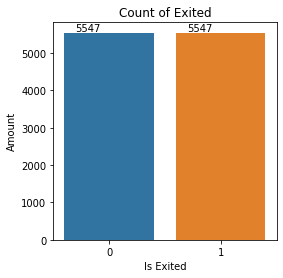

In [29]:
# displays the dimensions of the data before and after upsampling
print(y_train.value_counts()), print()
print(y_upsampled.value_counts())
print()

# Making diagrams
plt.figure(figsize=(4,4))
splot = sns.countplot(x=y_upsampled, order=df['exited'].value_counts().index)
plt.xlabel('Is Exited')
plt.ylabel('Amount')
plt.title('Count of Exited')
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

We have increased the number of *excited* *customer* data records from previously **1423** to **4269**.

In [30]:
# print the data shape
print(X_upsampled.shape)
print(y_upsampled.shape)

(11094, 11)
(11094,)


In [31]:
# display dataset dimensions
print('X_upsampled shape', X_upsampled.shape)
print('X_valid shape', X_valid.shape)
print('X_test shape', X_test.shape)

X_upsampled shape (11094, 11)
X_valid shape (1530, 11)
X_test shape (1500, 11)


In [32]:
# show the sample of upsampled data
X_upsampled

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
0,711,38,10.000000,0.000000,2,0,0,53311.780000,0,0,1
1,540,64,1.000000,91869.690000,1,0,1,95421.000000,1,0,1
2,511,58,0.000000,149117.310000,1,1,1,162599.510000,0,0,1
3,487,36,1.000000,140137.150000,1,1,0,194073.330000,0,1,0
4,633,59,2.000000,103996.740000,1,1,1,103159.110000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11089,745,38,7.235912,0.000000,1,1,0,183132.215210,0,0,0
11090,686,43,4.523581,65659.787873,1,0,1,21123.250757,0,0,0
11091,668,36,5.833976,139556.671902,1,1,0,51133.503397,0,0,0
11092,699,61,4.331104,0.000000,1,0,1,147424.482850,0,0,0


### 3.2. Standard Scaller

First, we will standardize the data by changing the training set and validation set using *transform* to **StandardScaller**.

In [33]:
# Create an instance of the class and tune the data using the training dataset.
scaler = StandardScaler()
scaler.fit(X_upsampled) 

# changing the training set and validation set
X_upsampled_scaled = scaler.transform(X_upsampled)
X_valid_scaled = scaler.transform(X_valid) 
X_test_scaled = scaler.transform(X_test)

In [34]:
# mengubah tabel array ke dalam format dataframe
X_upsampled = pd.DataFrame(X_upsampled_scaled, columns=X_upsampled.columns)
X_valid = pd.DataFrame(X_valid_scaled, columns=X_valid.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [35]:
# display the sample of data
X_upsampled

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
0,0.682537,-0.278753,1.936181,-1.333078,1.014790,-1.267304,-0.758554,-0.830538,-0.575199,-0.458631,1.189712
1,-1.193206,2.328909,-1.529869,0.156280,-0.724715,-1.267304,1.318297,-0.099214,1.738528,-0.458631,1.189712
2,-1.511314,1.727141,-1.914986,1.084358,-0.724715,0.789076,1.318297,1.067497,-0.575199,-0.458631,1.189712
3,-1.774576,-0.479343,-1.529869,0.938775,-0.724715,0.789076,-0.758554,1.614113,-0.575199,2.180401,-0.840540
4,-0.173065,1.827436,-1.144753,0.352880,-0.724715,0.789076,1.318297,0.035176,-0.575199,-0.458631,1.189712
...,...,...,...,...,...,...,...,...,...,...,...
11089,1.055492,-0.278753,0.871685,-1.333078,-0.724715,0.789076,-0.758554,1.424095,-0.575199,-0.458631,-0.840540
11090,0.408306,0.222720,-0.172879,-0.268625,-0.724715,-1.267304,1.318297,-1.389567,-0.575199,-0.458631,-0.840540
11091,0.210859,-0.479343,0.331776,0.929365,-0.724715,0.789076,-0.758554,-0.868369,-0.575199,-0.458631,-0.840540
11092,0.550906,2.028025,-0.247005,-1.333078,-0.724715,-1.267304,1.318297,0.803947,-0.575199,-0.458631,-0.840540


In [36]:
# displays the sample of the data
X_valid.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
0,0.704476,-1.582584,-0.374519,0.631335,-0.724715,0.789076,1.318297,-0.779180,-0.575199,-0.458631,-0.840540
1,0.320552,-1.582584,1.936181,-0.085299,1.014790,-1.267304,1.318297,0.527411,1.738528,-0.458631,-0.840540
2,-0.491173,-0.780227,-0.759636,1.076936,-0.724715,-1.267304,-0.758554,-1.019391,-0.575199,-0.458631,1.189712
3,-0.502143,-0.980816,-1.529869,0.770281,-0.724715,0.789076,-0.758554,0.139139,-0.575199,-0.458631,1.189712
4,-3.277364,-0.078164,-1.914986,0.468017,-0.724715,0.789076,1.318297,1.236337,-0.575199,-0.458631,-0.840540


In [37]:
# display scaled data dimensions
print('X_train scaled shape', X_upsampled.shape)
print('X_valid scaled shape', X_valid.shape)
print('X_test scaled shape', X_test.shape)

X_train scaled shape (11094, 11)
X_valid scaled shape (1530, 11)
X_test scaled shape (1500, 11)


## 4. Training Models with Scaling
### 4.1. Decision Tree

In [38]:
# create a decision tree model
print('Decision Tree Model')
dt_result = defaultdict(list)

for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_upsampled, y_upsampled)
    y_train_predict = model.predict(X_upsampled)
    y_valid_predict = model.predict(X_valid)
    dt_result['max_depth'].append(depth)
    dt_result['train_f1_score'].append(f1_score(y_upsampled, y_train_predict))
    dt_result['valid_f1_score'].append(f1_score(y_valid, y_valid_predict))

display(pd.DataFrame(dt_result))

Decision Tree Model


,max_depth,train_f1_score,valid_f1_score
0,1,0.700426,0.474916
1,2,0.686822,0.456942
2,3,0.767500,0.460358
3,4,0.777692,0.508371
4,5,0.807122,0.553134
5,6,0.814741,0.556962
6,7,0.825123,0.542135
7,8,0.842954,0.532374
8,9,0.858244,0.545455
9,10,0.882901,0.538776


- In the **Decision Tree** model that we trained before improving data quality, **max_depth = 7** is the best parameter with an f1 score level of **61%** and **58%** for train and validation set.

- Whereas in the model, after we improve the data quality, the value of **max_depth = 5** is the best parameter with an increase in f1 score on train around **19%**. Still, there is a decrease in the validation set, to **80 %** and **55%** for data train and validation sets.

- After improving the data quality, this model has increased **f1 score** although insignificant.

In [39]:
# create decision tree model
dt_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_model.fit(X_upsampled, y_upsampled)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [40]:
# accuracy score dt model compare
print('Decision Tree Model'), print('')
y_train_dt_pred = dt_model.predict(X_upsampled)
print('Training set accuracy =', accuracy_score(y_upsampled, y_train_dt_pred))
y_valid_dt_pred = dt_model.predict(X_valid)
print('Validation set accuracy =', accuracy_score(y_valid, y_valid_dt_pred))
y_test_dt_pred = dt_model.predict(X_test)
print('Test set accuracy',  accuracy_score(y_test, y_test_dt_pred))

Decision Tree Model

Training set accuracy = 0.8076437714079683
Validation set accuracy = 0.7856209150326797
Test set accuracy 0.7773333333333333


The accuracy value in training is lower than that in validation and testing, but it is still quite high at **79%**. 

Decision Tree

f1 Score = 0.549865229110512
AUC-ROC Score = 0.8133735429655734



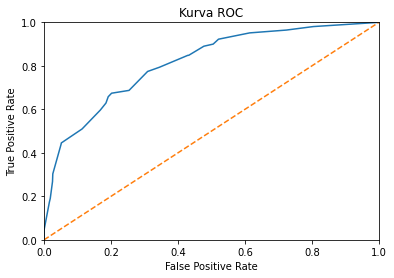

In [41]:
# creating ROC curves
probabilities_valid = dt_model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
auc_roc = roc_auc_score(y_test, probabilities_one_valid)

print('Decision Tree'), print()
print('f1 Score =', f1_score(y_test, y_test_dt_pred))
print('AUC-ROC Score =', auc_roc), print('')

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

**AUC-ROC Score** shows a value of **81%** with a fairly high curve; this shows that our model is quite good compared to the random model.

Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1190
           1       0.47      0.66      0.55       310

    accuracy                           0.78      1500
   macro avg       0.69      0.73      0.70      1500
weighted avg       0.81      0.78      0.79      1500




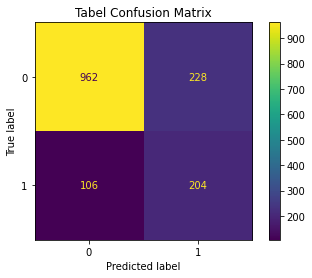

In [42]:
# classification report the dt model of data test
print('Decision Tree Classification Report'), print()
print(classification_report(y_test, y_test_dt_pred)), print()
# display confusion matrix of test data
cm = confusion_matrix(y_test, y_test_dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title('Tabel Confusion Matrix')
plt.show() 

- **Precision** for excited and stay customers has a fairly high percentage value only for train namely **90%** compared to validation which is only **47%**, this model only able to predict one class only.


- The **recall** value for customers who are loyal and not as big as **81%** and **66%**, which means that from all customer data that really stay and exited this model can only predict customers who are exited quite well in both groups of Bank Beta customers.

### 4.2. Logistic Regression

In [43]:
# create a logistic regression model
print('Logistic Regression Model')
lr_result = defaultdict(list)

for solv in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    model = LogisticRegression(solver=solv, class_weight='balanced')
    model.fit(X_upsampled, y_upsampled)
    y_train_predict = model.predict(X_upsampled)
    y_valid_predict = model.predict(X_valid)
    lr_result['solver'].append(solv)
    lr_result['train_f1_score'].append(f1_score(y_upsampled, y_train_predict))
    lr_result['valid_f1_score'].append(f1_score(y_valid, y_valid_predict))

display(pd.DataFrame(lr_result)) 

Logistic Regression Model


,solver,train_f1_score,valid_f1_score
0,newton-cg,0.781716,0.460296
1,lbfgs,0.781716,0.460296
2,liblinear,0.781716,0.460296
3,sag,0.781786,0.460296
4,saga,0.781716,0.460296


- In the **Logistic Regression** model that we trained before improving data quality, the parameter **solver = lbfgs** was the best parameter with an f1 score level of **84%** and **82%** for train and validation set.

- Whereas in this model, after we improve the data quality, all parameters have similar results, but experience a significant decrease in f1 score in the dataset or to **78%** for train data, even the validation set does not reach a minimum the specified threshold only gets **46%**.

- After improving data quality, the **Logistic Regression** model experienced a decrease in f1 score from the previous model with the parameter **solver = lbfgs** but experienced an increase in other parameters.

In [44]:
# create the best logisticregression model
lr_model = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr_model.fit(X_upsampled, y_upsampled)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [45]:
# accuracy score lg model compare
print('Logistic Regression Model'), print('')
y_train_lr_pred = lr_model.predict(X_upsampled)
print('Training set accuracy =', accuracy_score(y_upsampled, y_train_lr_pred))
y_valid_lr_pred = lr_model.predict(X_valid)
print('Validation set accuracy =', accuracy_score(y_valid, y_valid_lr_pred))
y_test_lr_pred = lr_model.predict(X_test)
print('Test set accuracy',  accuracy_score(y_test, y_test_lr_pred))

Logistic Regression Model

Training set accuracy = 0.7796106003244997
Validation set accuracy = 0.7379084967320262
Test set accuracy 0.7253333333333334


In this model, the accuracy value in training data is higher than validation, and test set has a percentage between **73% - 77%**.

Logistic Regression

f1 Score = 0.45789473684210524
AUC-ROC Score = 0.7396692870696666



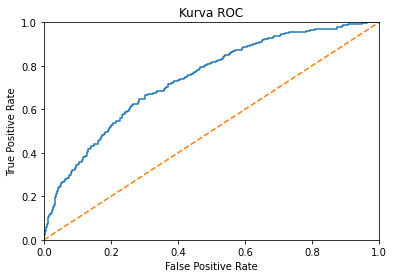

In [46]:
# creating ROC curves
probabilities_valid = lr_model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
auc_roc = roc_auc_score(y_test, probabilities_one_valid)

print('Logistic Regression'), print()
print('f1 Score =', f1_score(y_test, y_test_lr_pred))
print('AUC-ROC Score =', auc_roc), print('')

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

**AUC-ROC Score** shows a value of **83%** with a fairly high curve; this shows that our model is quite good compared to the random model.

Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1190
           1       0.39      0.56      0.46       310

    accuracy                           0.73      1500
   macro avg       0.63      0.66      0.64      1500
weighted avg       0.77      0.73      0.74      1500




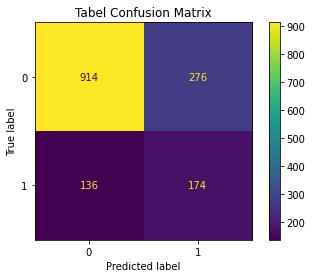

In [47]:
# classification report the lr model of data test
print('Logistic Regression Classification Report'), print()
print(classification_report(y_test, y_test_lr_pred)), print()
# display confusion matrix of test data
cm = confusion_matrix(y_test, y_test_lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title('Tabel Confusion Matrix')
plt.show() 

- **Precision** for exited and stay customers has a percentage value of **87%** and **39%**. This model is only good when predicting loyal customers rather than exited ones.


- The **recall** value for loyal and non-loyal customers is **77%** and **56%**, which means that from all customer data that actually stay and exited this model is good enough to predict both groups.

### 4.3. Random Forest

In [48]:
# create a random forest model
print('Random Forest Model')
rf_result = defaultdict(list)

for n in range(1,21):
    model = RandomForestClassifier(random_state=42, max_depth=n, class_weight='balanced')
    model.fit(X_upsampled, y_upsampled)
    y_train_predict = model.predict(X_upsampled)
    y_valid_predict = model.predict(X_valid)
    rf_result['max_depth'].append(n)
    rf_result['train_f1_score'].append(f1_score(y_upsampled, y_train_predict))
    rf_result['valid_f1_score'].append(f1_score(y_valid, y_valid_predict))

display(pd.DataFrame(rf_result))

Random Forest Model


,max_depth,train_f1_score,valid_f1_score
0,1,0.794097,0.493333
1,2,0.802373,0.502140
2,3,0.803079,0.509517
3,4,0.813625,0.541728
4,5,0.824954,0.542029
5,6,0.832058,0.556851
6,7,0.843654,0.562225
7,8,0.856159,0.558480
8,9,0.873925,0.555721
9,10,0.891782,0.574018


- The **Random Forest** model that we trained before improving data quality, the value of **max_depth = 55** is the best parameter with an f1 score level of **97%** and **56%** for train and validation sets and have very large differences for the two data.

- Whereas in the model, after we improve the quality of the data, the value of **max_depth = 13** is the best parameter and has an increase in f1 score in the validation set so that between the two data train and validation have a significant difference or become **96%** and **59%** for train and validation data sets.

- After improving the quality of the data on the **Random Forest** model, there was little significant change in the f1 score.

In [49]:
# create RandomForestClassifier best model
rf_model = RandomForestClassifier(random_state=42, max_depth=13, class_weight='balanced') 
rf_model.fit(X_upsampled, y_upsampled)

RandomForestClassifier(class_weight='balanced', max_depth=13, random_state=42)

In [50]:
# accuracy score rf model compare
print('Random Forest Model')
print('')
y_train_rf_pred = rf_model.predict(X_upsampled)
print('Training set accuracy =', accuracy_score(y_upsampled, y_train_rf_pred))
y_valid_rf_pred = rf_model.predict(X_valid)
print('Validation set accuracy =', accuracy_score(y_valid, y_valid_rf_pred))
y_test_rf_pred = rf_model.predict(X_test)
print('Test set accuracy',  accuracy_score(y_test, y_test_rf_pred))

Random Forest Model

Training set accuracy = 0.960248783126014
Validation set accuracy = 0.8294117647058824
Test set accuracy 0.8246666666666667


In this model, the accuracy level in the training set is very high, almost close to the perfect score of **96%**, while the validation and test have quite a high percentage, although still quite high at **82%** and **82%**.

Random Forest

f1 Score = 0.6045112781954888
AUC-ROC Score = 0.8361100569259963



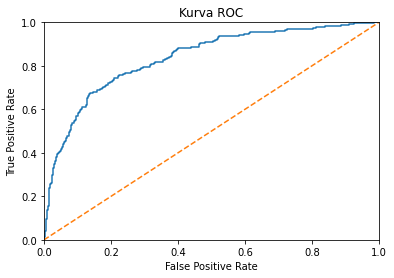

In [51]:
# creating ROC curves
probabilities_valid = rf_model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
auc_roc = roc_auc_score(y_test, probabilities_one_valid)

print('Random Forest'), print()
print('f1 Score =', f1_score(y_test, y_test_rf_pred))
print('AUC-ROC Score =', auc_roc), print('')

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

**AUC-ROC Score** shows a value of **83%** with a fairly high curve. This shows that our model is quite good compared to the random model.

Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1190
           1       0.57      0.65      0.60       310

    accuracy                           0.82      1500
   macro avg       0.74      0.76      0.75      1500
weighted avg       0.83      0.82      0.83      1500




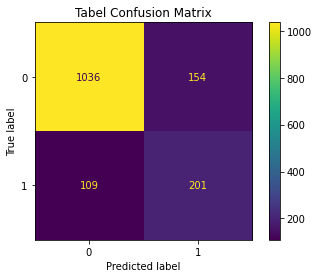

In [52]:
# classification report the rf model of data test
print('Random Forest Classification Report'), print()
print(classification_report(y_test, y_test_rf_pred))
print()
# display confusion matrix of test data
cm = confusion_matrix(y_test, y_test_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title('Tabel Confusion Matrix')
plt.show() 

- **Precision** for exited and stay customers have a percentage value of **89%** and **63%**, meaning that this model is quite good at predicting customers who are stay and exited. However, it has a fairly high margin.


- The **recall** value for loyal and non-loyal customers is **91%** and **58%**, which means that from all customer data that is really stay and exited this model is only able to predict by true to customers who are loyal very well then customers who are exited.

### 4.4. K-Nearest Neighbors

In [53]:
# modeling knn
print('K-Nearest Neighbors Model')
knn_result = defaultdict(list)

for n in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_upsampled, y_upsampled)
    y_train_predict = model.predict(X_upsampled)
    knn_result['n_neighbors'].append(n)
    knn_result['train_f1_score'].append(f1_score(y_upsampled, y_train_predict))
    knn_result['valid_f1_score'].append(f1_score(y_valid, y_valid_predict))

display(pd.DataFrame(knn_result))

K-Nearest Neighbors Model


,n_neighbors,train_f1_score,valid_f1_score
0,1,1.000000,0.582043
1,2,0.916602,0.582043
2,3,0.897862,0.582043
3,4,0.873096,0.582043
4,5,0.872498,0.582043
5,6,0.858072,0.582043
6,7,0.858342,0.582043
7,8,0.847492,0.582043
8,9,0.849342,0.582043
9,10,0.841504,0.582043


- The **K-Nearest Neighbors** model that we trained before improving data quality, **n-neighbors = 13**, is the best parameter with an f1 score level of **94%** and **42 %** for the train and *validation* sets and has a very large difference for the two data and no parameters can reach the specified threshold.

- Whereas in this model, after we improve the quality of the data, the value of **n-neighbors = 18** is the best parameter and increases f1 score in validation set or becomes **82%** and **50%** for train and validation data sets even though they have not been able to reach the specified threshold value with several tuning parameters.

- After improving the quality of the data on the **K-Nearest Neighbors** model, the value of f1 score has increased, meaning that the increase in data quality has had a significant impact on the learning of this model even though it cannot reach the specified threshold value.

In [54]:
# create the best KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=18)
knn_model.fit(X_upsampled, y_upsampled)

KNeighborsClassifier(n_neighbors=18)

In [55]:
# accuracy score knn model compare
print('K-Nearest Neighbors Model'), print('')
y_train_knn_pred = knn_model.predict(X_upsampled)
print('Training set accuracy =', accuracy_score(y_upsampled, y_train_knn_pred))
y_valid_knn_pred = knn_model.predict(X_valid)
print('Validation set accuracy =', accuracy_score(y_valid, y_valid_knn_pred))
y_test_knn_pred = knn_model.predict(X_test)
print('Test set accuracy',  accuracy_score(y_test, y_test_knn_pred))

K-Nearest Neighbors Model

Training set accuracy = 0.830629168920137
Validation set accuracy = 0.7810457516339869
Test set accuracy 0.786


This model also has similarities with the previous models, which have accuracy values in training lower than validation and test sets, with percentages between **78% - 83%**.

K-Nearest Neighbors

f1 Score = 0.5172932330827067
AUC-ROC Score = 0.7864841420439143



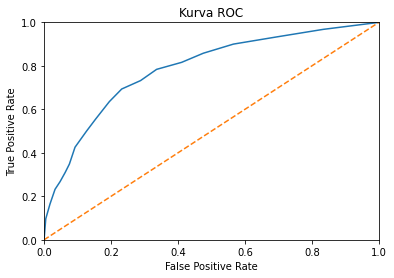

In [56]:
# creating ROC curves
probabilities_valid = knn_model.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
auc_roc = roc_auc_score(y_test, probabilities_one_valid)

print('K-Nearest Neighbors'), print('')
print('f1 Score =', f1_score(y_test, y_test_knn_pred))
print('AUC-ROC Score =', auc_roc), print('')

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

**AUC-ROC Score** shows a value of **78%** with a fairly high curve; this shows that our model is quite good compared to the random model.

K-Nearest Neighbors Classisfication Report

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1190
           1       0.48      0.55      0.52       310

    accuracy                           0.79      1500
   macro avg       0.68      0.70      0.69      1500
weighted avg       0.80      0.79      0.79      1500




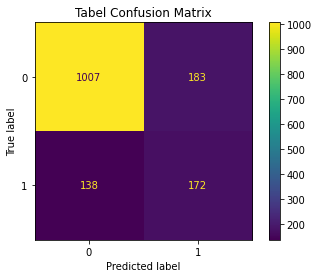

In [57]:
# classification report the knn model of data test
print('K-Nearest Neighbors Classisfication Report'), print('')
print(classification_report(y_test, y_test_knn_pred))
print()
# display confusion matrix of test data
cm = confusion_matrix(y_test, y_test_knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title('Tabel Confusion Matrix')
plt.show() 

- **Precision** for customers who are not exited has a percentage value of **88%**, meaning that predictions for customers who continue to use bank services have a very high value with a very large difference from those who are disloyal who have an accuracy percentage of **48%**.


- The **recall** value for loyal customers is **85%**, which means that from all the data customers who actually stay quite a lot are predicted correctly, meanwhile the **recall** value is for customers who are exited reach **55%**.

#Conclusions

**1. Data Preparation**
- We start by loading a dataset consisting of **14** columns and **10,000** rows, the column types are defined correctly.
- There is a *missing value* of **909** rows or **9%** from the data in the 'tenure' column, and we have filled in the average age.
- We also changed the *register* column names to lowercase for easy analysis.

**2. EDA and Data Visualization**
- Of the two groups of customers who are *exited* and those who are not, the majority have an average credit score between **550 - 750**.
- Many customers have no remaining balance in their *account* there are around **500** people from the **exited** group and more than **3000** customers from the *stay* group. The other majority are from they also have an average *balance* between **100,000 - 150,000**
- *Estimated Salary* has an even distribution starting from **0 - 200,000**.
- The majority of the group that remained faithful had an age range of under **50** years, while the **exited** group had an age range of **40-60** years.
- The majority of Bank Beta's customers come from France
- Most Bank Beta customers use at least **1-2** products issued by the bank.
- The majority of Bank Beta's customers also have a card.

**3. Split the Data**
- Comparison of data in the `exited` column of **80** with **20** we divide the data into **3** types with the proportion **70%** *training set*, **15%** * validation set*, and **15%** for *test set*.

**4. Models without Class Adjustment**
1. In the **Decision Tree Classifier** model, the results obtained cannot reach the limit for the *fi score* on the `train set` and `validation set`. The best parameter is **max_dept = 7**.
2. **Logistic Regression** model results obtained are higher than **Decision Tree**, with values on *train* and *validation* set of **84%** and **82%** and have passed *threshold* value. The best model is obtained by setting the parameter **solver = lbfgs**.
3. In the **Random Forest** model, the best model is obtained by setting **n-estimators = 5**, having a very large difference between the *training set* and the *validation set*.
4. In the **K-Nearest Neighbors** model, we define **n-neighbors** in the range **1 - 20**, and the best model is obtained at the value **n-neighbors = 13** even though **f1** there is nothing that can exceed the specified threshold value.

**5. Improving Model Quality**
- We improve the quality of the model with the **upsampling** method by randomizing **3** times to adjust the class balance and using the **StandardScaller** method to adjust the scale.
- We also apply the `class_weight = balanced` parameter to some models.

**6. Models After Improved Quality**
1. In the **Decision Tree Classifier** model, **max_depth = 5** is the best parameter with an increase in *f1 score* in each dataset of around **19%** or to **80%** and **55%** for data *train* and *validation* sets.
2. The **Logistic Regression** model has decreased *f1 score* on datasets of around **15%** or becomes **78%** for *train* data, even *validation* sets do not reach the specified minimum threshold only get **46%**, this model is better before *balanced* data.
3. The **Random Forest** model with a value of **n-estimators = 9** is the best parameter and has an increase in *f1 score* in the *validation set* so that between the two *train* and *validation* data there is a significant difference or to **82%** and **50%** for data *train* and *validation* sets and do not reach threshold values.
4. The **K-Nearest Neighbors** model, with a value of **n-neighbors = 18**, is the best parameter and has an increase in *f1 score* in the *validation set* or becomes **69%** and **57%** for *train* and *validation* data sets even though they have not been able to reach the specified threshold value with several *tuning* parameters.

The value of **AUC-ROC Score** in all models is above **70 - 80%**, this shows that our model is better than the random model.

**Main Conclusion**

We found the best model after *balancing data* with the highest *f1 score* in **Random Forest** with the `max_depth` parameter set to **13**, obtaining *f1 score* **60%** on *test set*.